<div style="border: 2px solid black; border-radius: 10px; padding: 15px; text-align: left; font-family: Arial, sans-serif; width: 80%; max-width: 700px; margin: auto;">
  <h1>📊 Mental Health Analysis </h1>
  
  <h4>Introduction</h4>
  <ul>
    <li>This notebook aims to analyze and predict the Depression using  machine learning models. We will preprocess the data, fill missing values, and evaluate model performance.</li>
 
  </ul>
​
</div>

# **Data Exploration**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('train.csv')


In [4]:
train.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [5]:
train['Gender'].value_counts()

Gender
Male      77464
Female    63236
Name: count, dtype: int64

In [6]:
train.shape

(140700, 20)

In [7]:
class_counts = train['Depression'].value_counts()
print(class_counts)

# Determine the size of the minority class
minority_class_size = class_counts.min()

# Separate majority and minority classes
majority_class = train[train['Depression'] == 0]  # Adjust according to your dataset
minority_class = train[train['Depression'] == 1]

# Downsample majority class
majority_class_downsampled = majority_class.sample(minority_class_size, random_state=42)

# Combine the downsampled majority class with the minority class
balanced_df = pd.concat([majority_class_downsampled, minority_class])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(balanced_df['Depression'].value_counts())


Depression
0    115133
1     25567
Name: count, dtype: int64
Depression
0    25567
1    25567
Name: count, dtype: int64


In [8]:
print(train['Age'].max())
print(train['Age'].min())

60.0
18.0


In [9]:
train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

Skewness: 0.01176384694368645


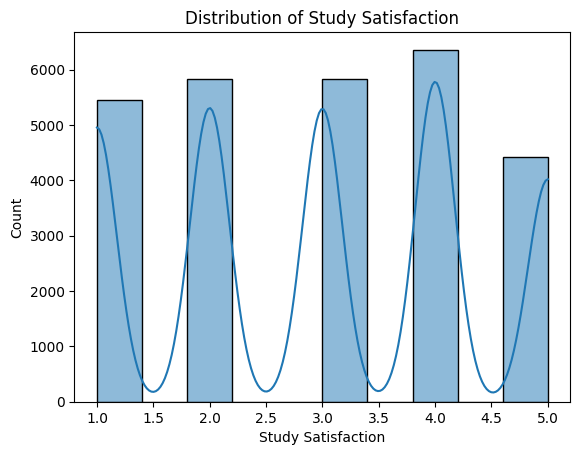

In [10]:
from scipy.stats import skew
skewness = train['Study Satisfaction'].skew()
print(f'Skewness: {skewness}')

# Plotting
sns.histplot(train['Study Satisfaction'], bins=10, kde=True)
plt.title('Distribution of Study Satisfaction')
plt.show()

In [11]:
# Replace 'target' with the name of your target column
class_distribution = train['Depression'].value_counts()
print(class_distribution)


Depression
0    115133
1     25567
Name: count, dtype: int64


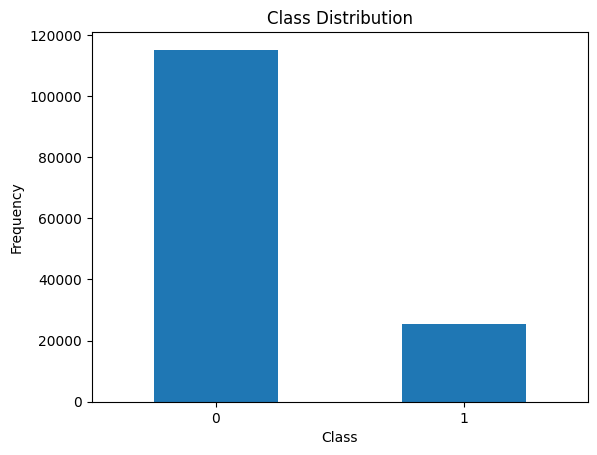

In [12]:

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [13]:
class_counts = train['Depression'].value_counts()
print(class_counts)

# Determine the size of the minority class
minority_class_size = class_counts.min()

# Separate majority and minority classes
majority_class = train[train['Depression'] == 0]  # Adjust according to your dataset
minority_class = train[train['Depression'] == 1]

# Downsample majority class
majority_class_downsampled = majority_class.sample(minority_class_size, random_state=42)

# Combine the downsampled majority class with the minority class
balanced_df = pd.concat([majority_class_downsampled, minority_class])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(balanced_df['Depression'].value_counts())


Depression
0    115133
1     25567
Name: count, dtype: int64
Depression
0    25567
1    25567
Name: count, dtype: int64


In [14]:
train.shape

(140700, 20)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [16]:
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

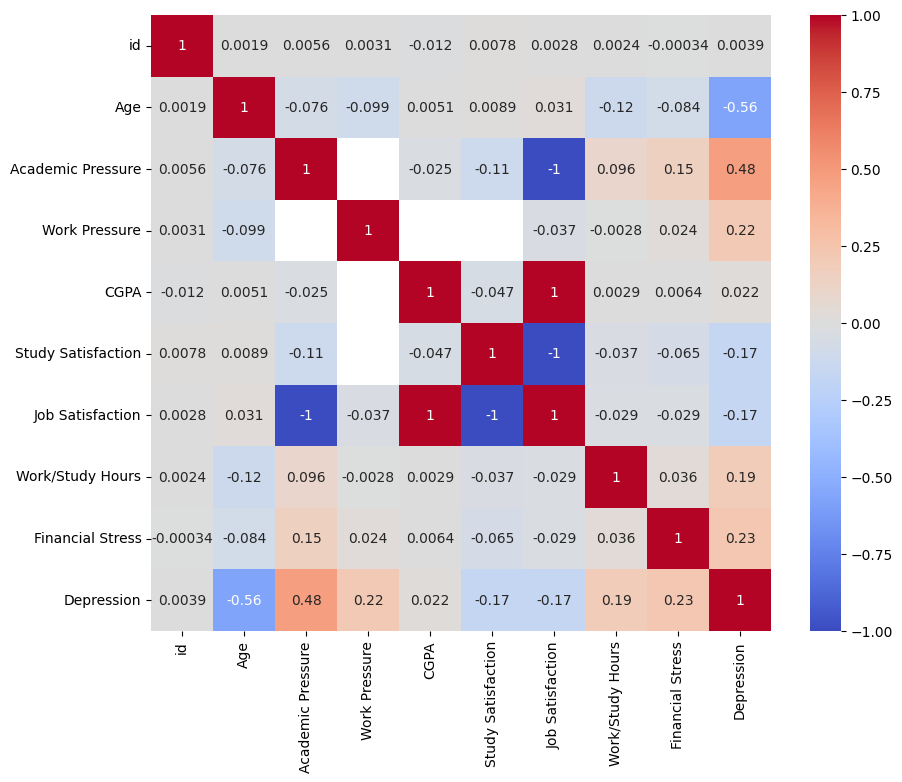

In [17]:
# Select only numeric columns
numeric_data = train.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


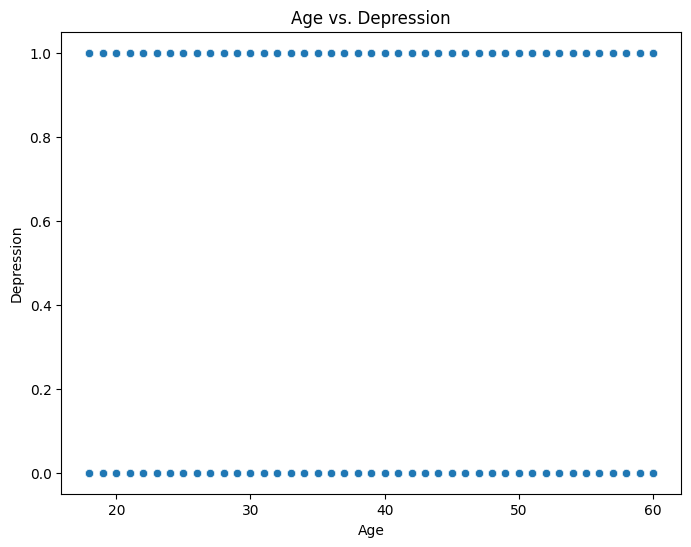

In [18]:
# Example: Scatter plot of Age vs. Depression
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Depression', data=train)
plt.title('Age vs. Depression')
plt.show()

In [19]:
# Check memory usage of each column
memory_info = train.memory_usage(deep=True)
print(memory_info)

Index                                        132
id                                       1125600
Name                                     7688498
Gender                                   7583572
Age                                      1125600
City                                     7881652
Working Professional or Student          9345587
Profession                               7383863
Academic Pressure                        1125600
Work Pressure                            1125600
CGPA                                     1125600
Study Satisfaction                       1125600
Job Satisfaction                         1125600
Sleep Duration                           8732655
Dietary Habits                           8021249
Degree                                   7510905
Have you ever had suicidal thoughts ?    7245262
Work/Study Hours                         1125600
Financial Stress                         1125600
Family History of Mental Illness         7245642
Depression          

# **Preprocessing of Data**

In [20]:
train.shape

(140700, 20)

In [21]:
# Randomly sample 10% of the data
train_data= train.sample(frac=0.3, random_state=42)  # frac=0.1 means 10%


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42210 entries, 18347 to 33021
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     42210 non-null  int64  
 1   Name                                   42210 non-null  object 
 2   Gender                                 42210 non-null  object 
 3   Age                                    42210 non-null  float64
 4   City                                   42210 non-null  object 
 5   Working Professional or Student        42210 non-null  object 
 6   Profession                             31162 non-null  object 
 7   Academic Pressure                      8408 non-null   float64
 8   Work Pressure                          33795 non-null  float64
 9   CGPA                                   8409 non-null   float64
 10  Study Satisfaction                     8407 non-null   float64
 11  Job

In [23]:
numeric_data=['Age',  'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
        'Work/Study Hours',
       'Financial Stress',  'Depression']

categorical_data=[ 'Gender',  'City',
       'Working Professional or Student', 'Profession', 
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 
        'Family History of Mental Illness']

In [24]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical data (e.g., using 'mean' strategy)
num_imputer = SimpleImputer(strategy='mean')  # You can also use 'median'

# Impute missing values in the numerical columns
train_data[numeric_data] = num_imputer.fit_transform(train_data[numeric_data])



# Create an imputer for categorical data (e.g., using 'most_frequent' strategy)
cat_imputer = SimpleImputer(strategy='most_frequent')  # You can use 'constant' to fill with a custom value

# Impute missing values in the categorical columns
train_data[categorical_data] = cat_imputer.fit_transform(train_data[categorical_data])


In [25]:
train_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18347,18347,Sanya,Female,51.0,Patna,Working Professional,Teacher,3.165913,3.000000,7.653666,2.934935,5.000000,More than 8 hours,Moderate,B.Ed,No,11.0,2.0,Yes,0.0
96193,96193,Sneha,Female,20.0,Agra,Working Professional,Teacher,3.165913,1.000000,7.653666,2.934935,4.000000,Less than 5 hours,Moderate,Class 12,No,0.0,5.0,Yes,0.0
100005,100005,Aanchal,Female,21.0,Ahmedabad,Student,Teacher,2.000000,2.998491,7.820000,5.000000,2.979879,5-6 hours,Healthy,MA,Yes,12.0,2.0,Yes,0.0
39890,39890,Rahil,Male,36.0,Indore,Working Professional,Teacher,3.165913,5.000000,7.653666,2.934935,2.000000,Less than 5 hours,Moderate,MBBS,No,1.0,1.0,No,0.0
98243,98243,Rishi,Male,60.0,Mumbai,Working Professional,HR Manager,3.165913,2.000000,7.653666,2.934935,2.000000,5-6 hours,Moderate,BBA,No,6.0,2.0,No,0.0


In [26]:
from sklearn.impute import KNNImputer,SimpleImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [27]:
label_encoders = {}
for column in categorical_data:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le

In [28]:
# Set Pandas display option to show all columns
pd.set_option('display.max_columns', None)
train_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18347,18347,Sanya,0,51.0,42,1,44,3.165913,3.000000,7.653666,2.934935,5.000000,12,4,5,0,11.0,2.0,1,0.0
96193,96193,Sneha,0,20.0,2,1,44,3.165913,1.000000,7.653666,2.934935,4.000000,11,4,22,0,0.0,5.0,1,0.0
100005,100005,Aanchal,0,21.0,3,0,44,2.000000,2.998491,7.820000,5.000000,2.979879,5,2,40,1,12.0,2.0,1,0.0
39890,39890,Rahil,1,36.0,17,1,44,3.165913,5.000000,7.653666,2.934935,2.000000,11,4,42,0,1.0,1.0,0,0.0
98243,98243,Rishi,1,60.0,36,1,21,3.165913,2.000000,7.653666,2.934935,2.000000,5,4,10,0,6.0,2.0,0,0.0


In [29]:
train_data.shape

(42210, 20)

# **Model Traning**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import optuna


In [31]:
features=['Age',  'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
        'Work/Study Hours',
       'Financial Stress',  'Gender', 
       'Working Professional or Student', 'Profession', 
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 
        'Family History of Mental Illness']
    

In [32]:

X = train_data[features]
y=train_data['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Define the LightGBM objective function
def objective_lgbm(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'verbose': -1,
        # Hyperparameters to optimize
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),  # Max number of leaves
        'max_depth': trial.suggest_int('max_depth', 5, 15),  # Maximum depth of trees
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),  # Learning rate
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),  # Feature subsampling
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),  # Data subsampling
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),  # Frequency of bagging
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 5.0),  # L1 regularization
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 5.0),  # L2 regularization
    }

    model = LGBMClassifier(**params, n_estimators=200)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Define the XGBoost objective function
def objective_xgboost(trial):
    params = {
        'objective': 'binary:logistic',  # For binary classification
        'eval_metric': 'logloss',  # Log loss for binary classification
        'max_depth': trial.suggest_int('max_depth', 3, 12),  # Maximum depth of the tree
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),  # Learning rate
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),  # Subsampling ratio
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),  # Feature subsampling
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # Minimum sum of instance weight
        'gamma': trial.suggest_float('gamma', 0, 5),  # Minimum loss reduction
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),  # L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 5.0),  # L2 regularization
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 5.0),  # Class imbalance adjustment
        'random_state': 42
    }

    model = xgb.XGBClassifier(**params, n_estimators=200)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create an Optuna study for LightGBM
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=100)

print("Best parameters for LightGBM:", study_lgbm.best_params)
print("Best accuracy for LightGBM:", study_lgbm.best_value)

# Create an Optuna study for XGBoost
study_xgboost = optuna.create_study(direction='maximize')
study_xgboost.optimize(objective_xgboost, n_trials=100)

print("Best parameters for XGBoost:", study_xgboost.best_params)
print("Best accuracy for XGBoost:", study_xgboost.best_value)


[I 2024-12-24 20:08:09,449] A new study created in memory with name: no-name-74c05f14-2ca2-4a17-a48b-5d0f0ae1e5f6
[I 2024-12-24 20:08:19,463] Trial 0 finished with value: 0.9340203743188817 and parameters: {'num_leaves': 86, 'max_depth': 15, 'learning_rate': 0.02891369608298984, 'feature_fraction': 0.8444468707340018, 'bagging_fraction': 0.7321710991913101, 'bagging_freq': 10, 'lambda_l1': 4.499652332601888, 'lambda_l2': 2.7493997742834893}. Best is trial 0 with value: 0.9340203743188817.
[I 2024-12-24 20:08:27,245] Trial 1 finished with value: 0.9350864723999053 and parameters: {'num_leaves': 61, 'max_depth': 12, 'learning_rate': 0.024624209334139845, 'feature_fraction': 0.64826440681997, 'bagging_fraction': 0.7674388785439846, 'bagging_freq': 6, 'lambda_l1': 4.934626001540431, 'lambda_l2': 4.32489056161817}. Best is trial 1 with value: 0.9350864723999053.
[I 2024-12-24 20:08:35,753] Trial 2 finished with value: 0.9343757403458895 and parameters: {'num_leaves': 94, 'max_depth': 15, 'l

Best parameters for LightGBM: {'num_leaves': 45, 'max_depth': 14, 'learning_rate': 0.02692391027477281, 'feature_fraction': 0.7725669143308956, 'bagging_fraction': 0.6023011726252786, 'bagging_freq': 9, 'lambda_l1': 3.650962445033106, 'lambda_l2': 1.1509576839152804}
Best accuracy for LightGBM: 0.9362710258232646


[I 2024-12-24 20:20:21,860] Trial 0 finished with value: 0.9337834636342099 and parameters: {'max_depth': 4, 'learning_rate': 0.0536494954539848, 'subsample': 0.6426884385888837, 'colsample_bytree': 0.793667198504795, 'min_child_weight': 4, 'gamma': 1.7155573674370905, 'reg_alpha': 0.37956583827277746, 'reg_lambda': 4.183833452974611, 'scale_pos_weight': 1.7504137556657402}. Best is trial 0 with value: 0.9337834636342099.
[I 2024-12-24 20:20:24,794] Trial 1 finished with value: 0.9323619995261786 and parameters: {'max_depth': 11, 'learning_rate': 0.06271373694740229, 'subsample': 0.6035713079299974, 'colsample_bytree': 0.6982871837279785, 'min_child_weight': 6, 'gamma': 1.9606772692170094, 'reg_alpha': 0.7121636706600435, 'reg_lambda': 1.4089794769968398, 'scale_pos_weight': 1.6876850479931411}. Best is trial 0 with value: 0.9337834636342099.
[I 2024-12-24 20:20:29,127] Trial 2 finished with value: 0.9304667140488037 and parameters: {'max_depth': 8, 'learning_rate': 0.02819489137397686

Best parameters for XGBoost: {'max_depth': 7, 'learning_rate': 0.06395608952333272, 'subsample': 0.6083590880730916, 'colsample_bytree': 0.7212425782942216, 'min_child_weight': 7, 'gamma': 4.9734519071911, 'reg_alpha': 0.5136107744855823, 'reg_lambda': 4.6809980484562725, 'scale_pos_weight': 1.0057515322818886}
Best accuracy for XGBoost: 0.937455579246624


In [34]:

model1 = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)

# Train LightGBM with the best found parameters
best_lgbm_params = study_lgbm.best_params
LG = LGBMClassifier(**best_lgbm_params, n_estimators=200)

# Train XGBoost with the best found parameters
best_xgboost_params = study_xgboost.best_params
XG= xgb.XGBClassifier(**best_xgboost_params, n_estimators=200)

# Create an ensemble model using VotingClassifier

ensemble_model = VotingClassifier(estimators=[('XGB', XG),('lgb',LG),('RF',model1)], voting='hard')


ensemble_model.fit(X_train, y_train)
# Make predictions with the ensemble model

y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

# Perform cross-validation

cv_scores = cross_val_score(ensemble_model, X, y, cv=5)  # 5-fold cross-validation

# **Evaluate The Models**

In [35]:
print(f'Ensemble Model Accuracy Score: {accuracy_ensemble:.2f}')
# Print cross-validation results
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'\nMean Cross-Validation Score: {cv_scores.mean():.2f}')

Ensemble Model Accuracy Score: 0.94

Cross-Validation Scores: [0.9357972  0.93923241 0.93484956 0.93982469 0.93413883]

Mean Cross-Validation Score: 0.94


# **Save Model**

In [36]:
import re
import joblib

joblib.dump(ensemble_model, 'model.pkl')

# Save the label encoders with sanitized filenames
for column, le in label_encoders.items():
    # Sanitize the column name to create a valid filename
    sanitized_column = re.sub(r'[^a-zA-Z0-9]', '_', column)  # Replace non-alphanumeric characters with underscores
    joblib.dump(le, f'label_encoder_{sanitized_column}.pkl')

print("Model and encoders saved successfully!")

Model and encoders saved successfully!


<div style="border: 2px solid #FFA500; border-radius: 10px; padding: 10px; background-color: #FFF5E6; text-align: center; font-family: Arial, sans-serif; width: 80%; max-width: 600px; margin: auto;">
  <h3 style="color: #FFA500;">👍 <strong>Enjoyed this guide?</strong></h3>
  <p style="color: #333333;">If you found this guide helpful, please consider giving it an upvote! Your support helps us continue to create valuable content and improve our resources.</p>
  <p style="font-size: 16px; color: #FF8C00;">Thank you! 😊</p>
</div>
